# Convergence of the Fourier series 

and the dependence on the smoothness of the function.


In [1]:
using LinearAlgebra
using PyPlot


Hat function

$$
f(x)=\begin{cases}
x, & 0\le x\le \pi/2,\\
\pi-x, &\pi/2 \le x\le \pi.
\end{cases}
$$

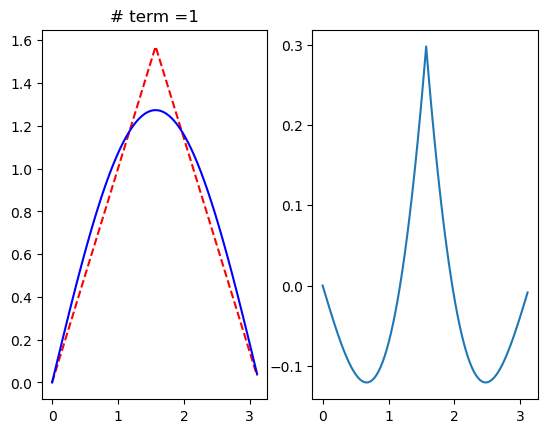

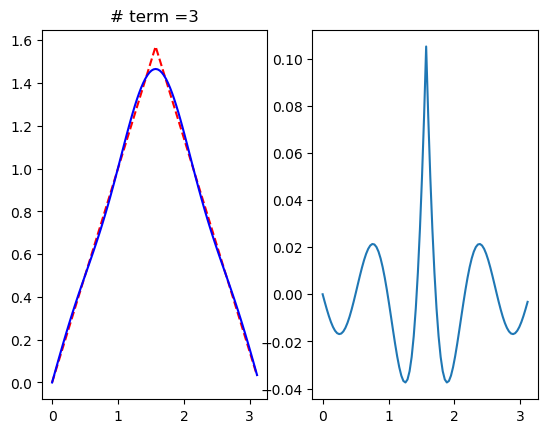

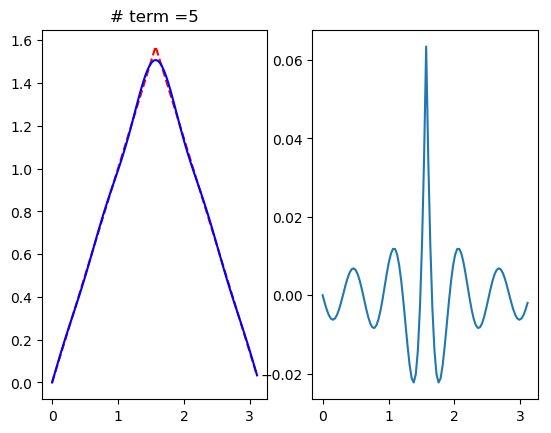

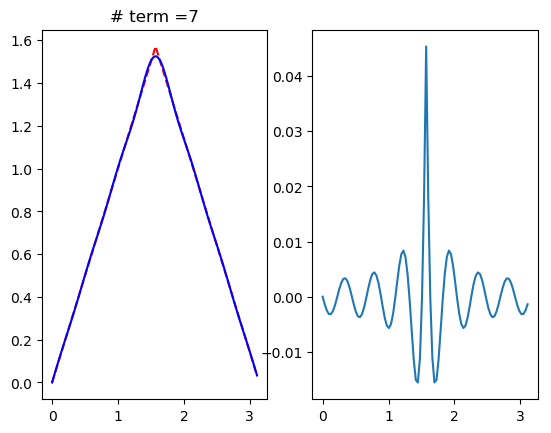

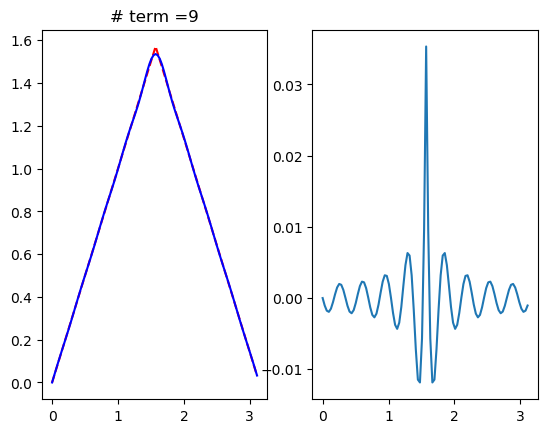

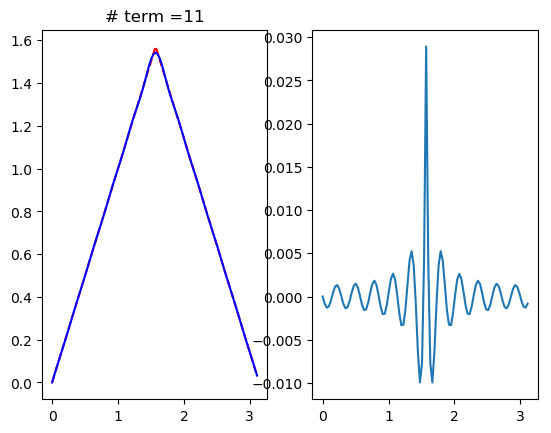

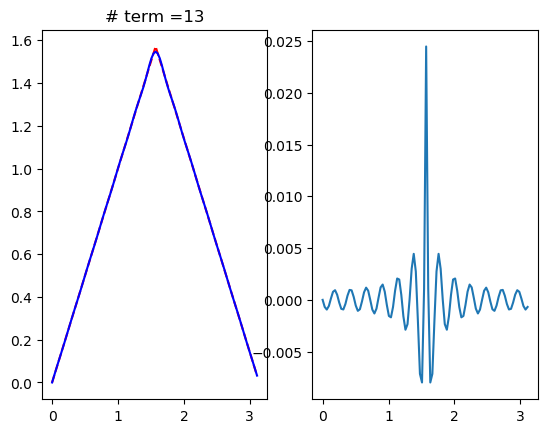

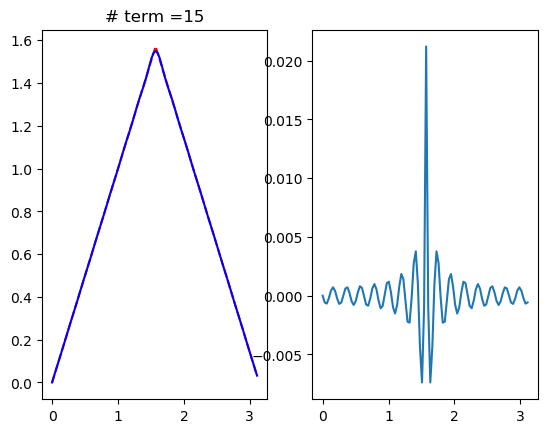

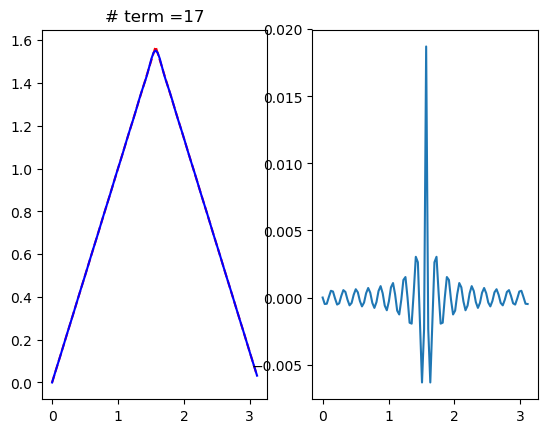

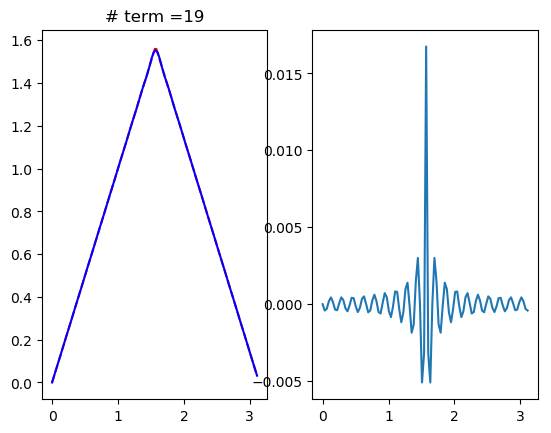

In [3]:
N=100
x_vec=[i*pi/N for i in 0:N-1]

f_vec=[ (x<=pi/2) ? x : pi-x for x in x_vec]

term_vec = collect(1:2:20)
for l = 1 : length(term_vec)
    n_term = term_vec[l]
    g_vec = zeros(size(x_vec))
    for k = 1 : n_term
        g_vec = g_vec + 4.0/(pi*(2*k-1)^2)*(-1)^(k-1)*sin.((2*k-1)*x_vec);
    end
    figure(l)
    subplot(1,2,1)
    title("# term =$n_term")
    plot(x_vec,f_vec,"r--")
    plot(x_vec,g_vec,"b-")
    subplot(1,2,2)
    plot(x_vec,f_vec-g_vec)
end


Some additional examples

**Example 1**: step function

$$
f(x)=\begin{cases}
1, & 0\le x\le \pi,\\
-1, &-\pi \le x<0.
\end{cases}
$$

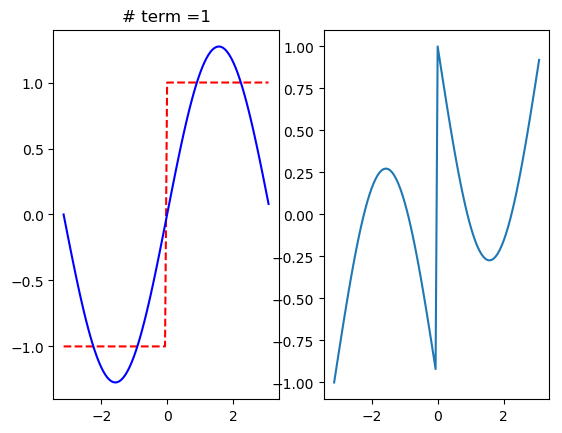

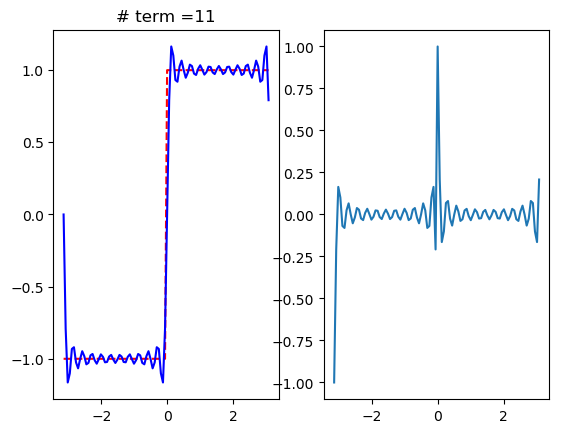

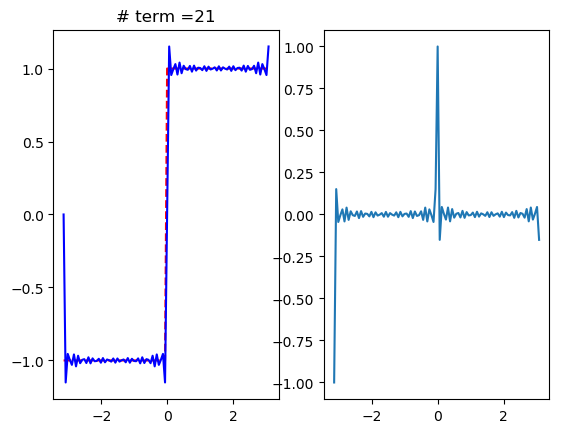

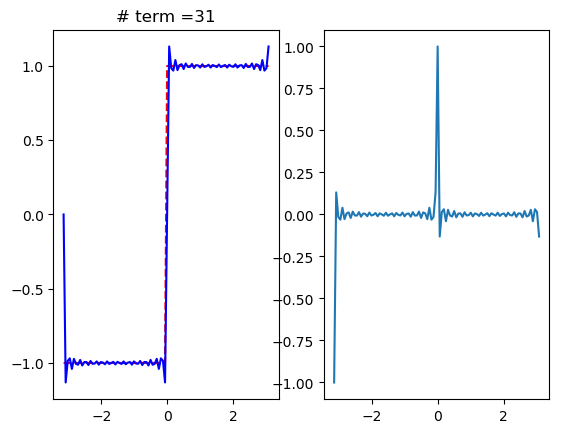

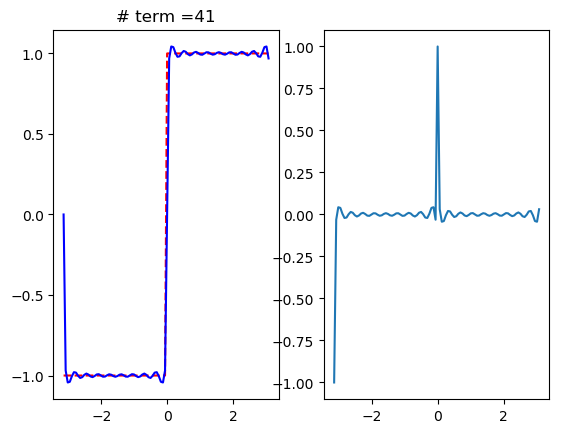

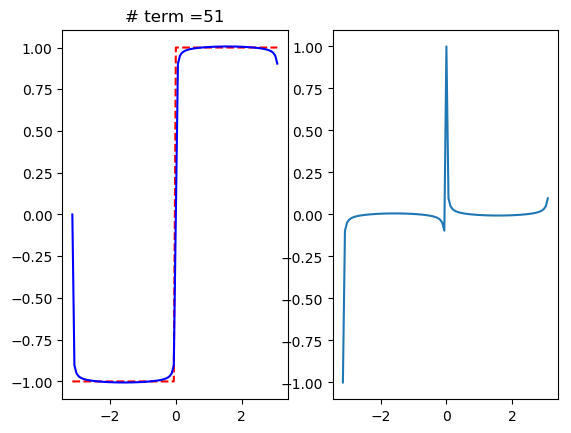

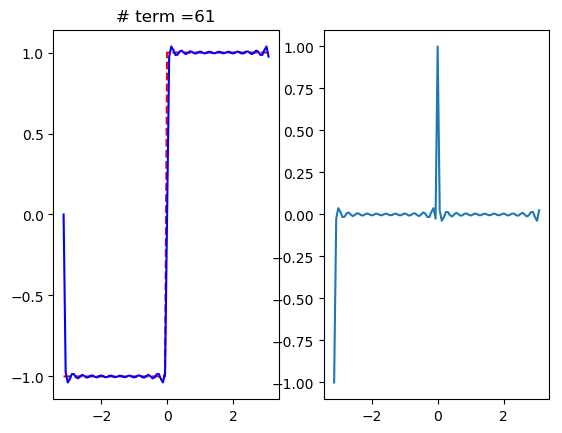

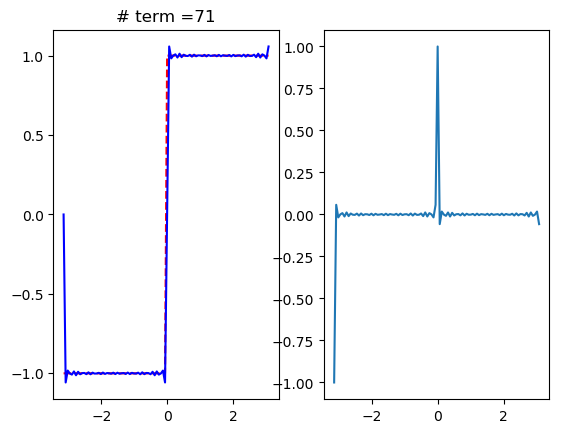

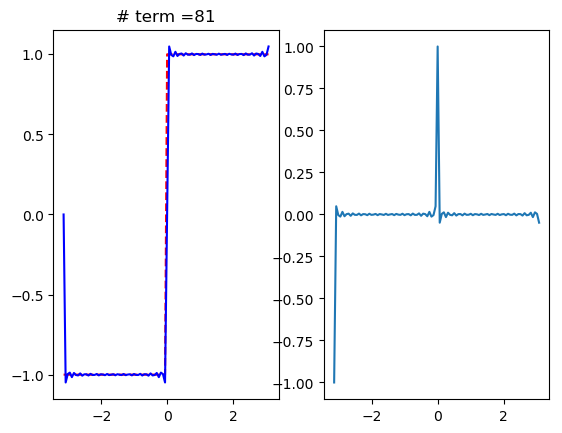

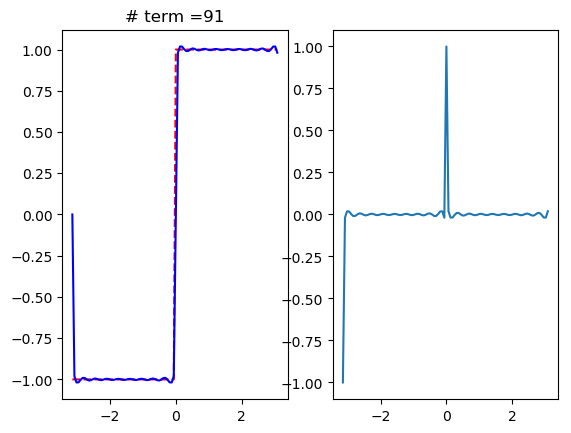

In [60]:
N=100
x_vec=[-pi+i*(2.0*pi)/N for i in 0:N-1]

f_vec=[ (x>=0) ? 1.0 : -1.0 for x in x_vec]

term_vec = collect(1:10:100)
for l = 1 : length(term_vec)
    n_term = term_vec[l]
    g_vec = zeros(size(x_vec))
    for k = 1 : n_term
        g_vec = g_vec + 4.0/pi*(1.0/(2*k-1))*sin.((2*k-1)*x_vec);
    end
    figure(l)
    subplot(1,2,1)
    title("# term =$n_term")
    plot(x_vec,f_vec,"r--")
    plot(x_vec,g_vec,"b-")
    subplot(1,2,2)
    plot(x_vec,f_vec-g_vec)
end


**Example 2**: absolute value

$$
f(x)=|x|, \quad x\in[-1,1]
$$

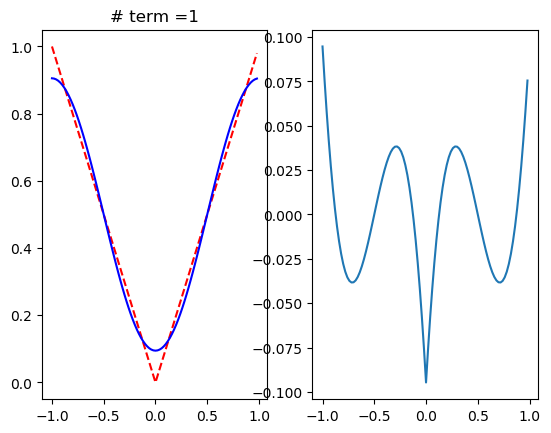

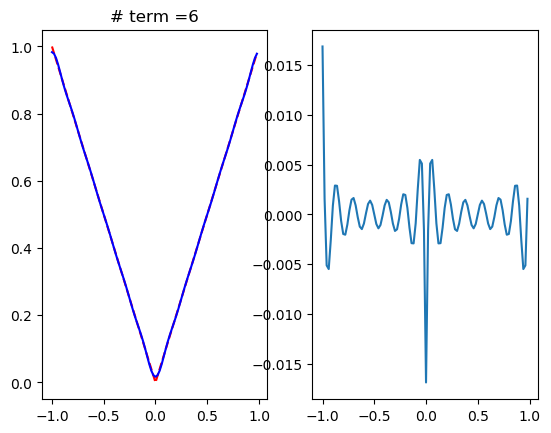

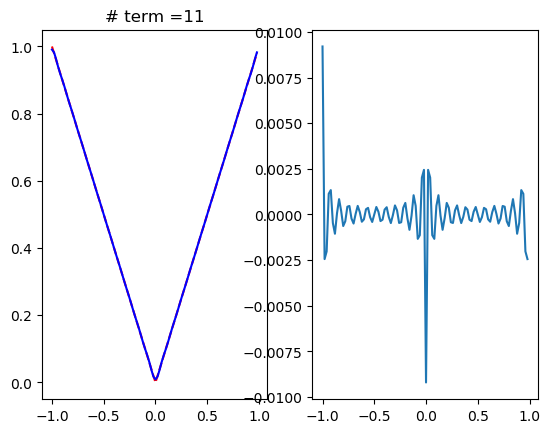

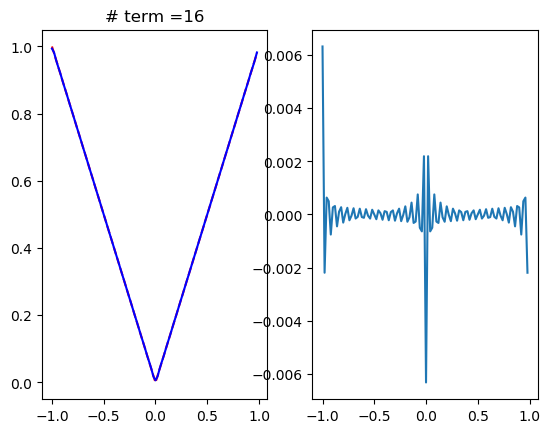

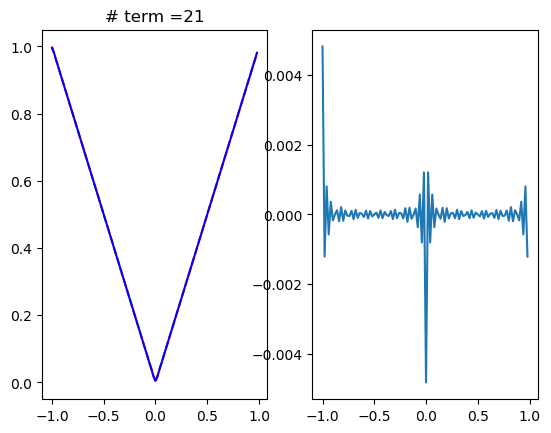

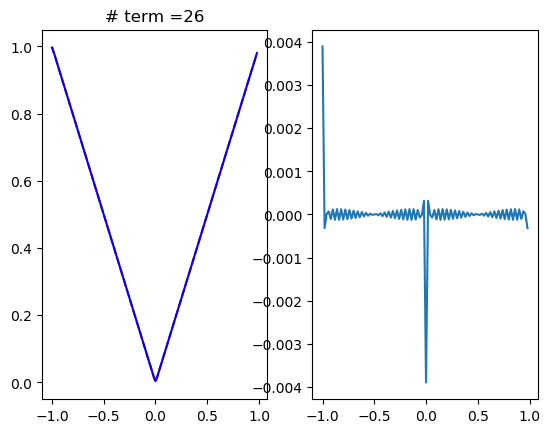

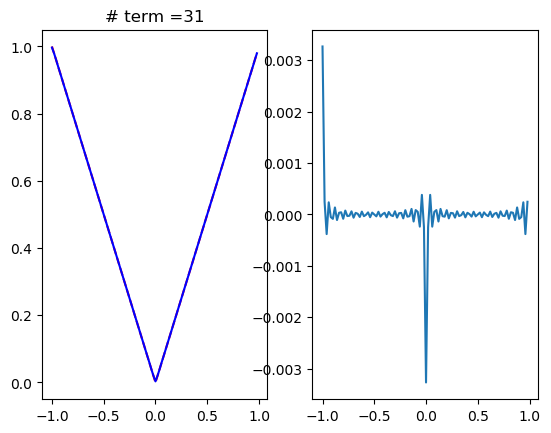

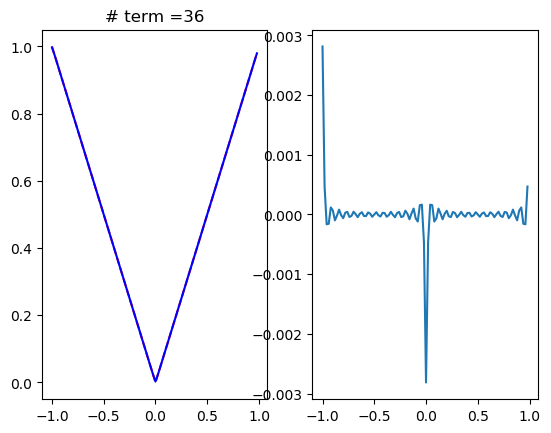

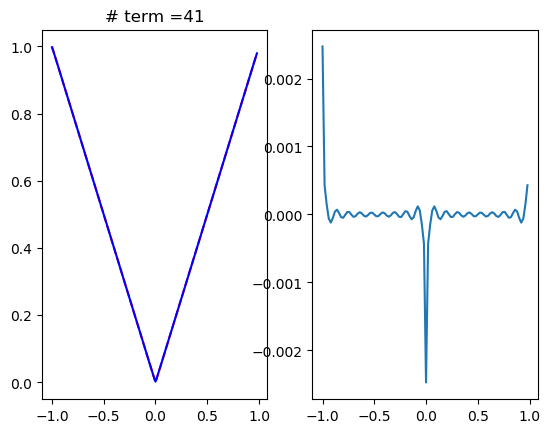

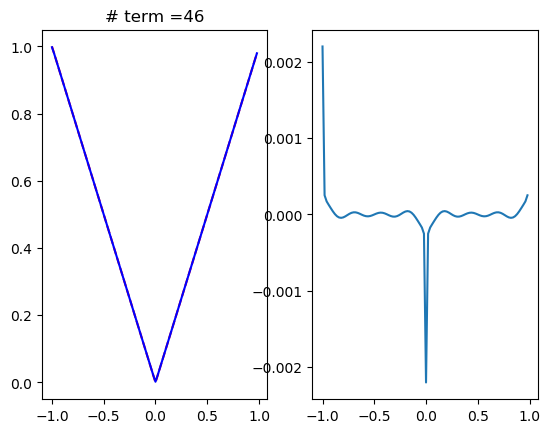

In [59]:
N=100
x_vec=[-1.0+i*2.0/N for i in 0:N-1]

f_vec= abs.(x_vec)

term_vec = collect(1:5:50)
for l = 1 : length(term_vec)
    n_term = term_vec[l]
    g_vec = 0.5*ones(size(x_vec))
    for k = 1 : n_term
        g_vec = g_vec - 4/pi^2*1/(2*k-1)^2*cos.((2*k-1)*pi*x_vec)
    end
    figure(l)
    subplot(1,2,1)
    title("# term =$n_term")
    plot(x_vec,f_vec,"r--")
    plot(x_vec,g_vec,"b-")
    subplot(1,2,2)
    plot(x_vec,f_vec-g_vec)
end


**Example 3**: smooth function

$$
f(x)=\sin(\sin(x)), \quad x\in[0,2\pi]
$$

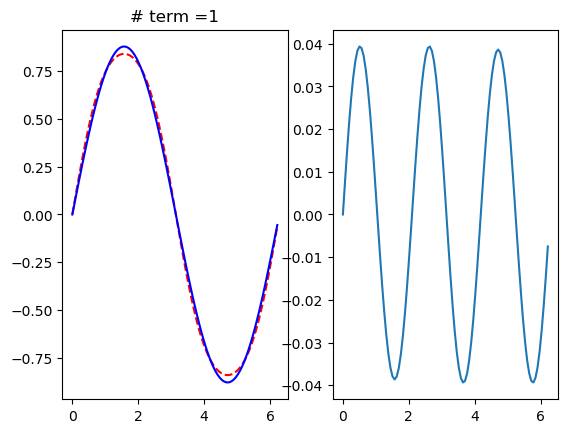

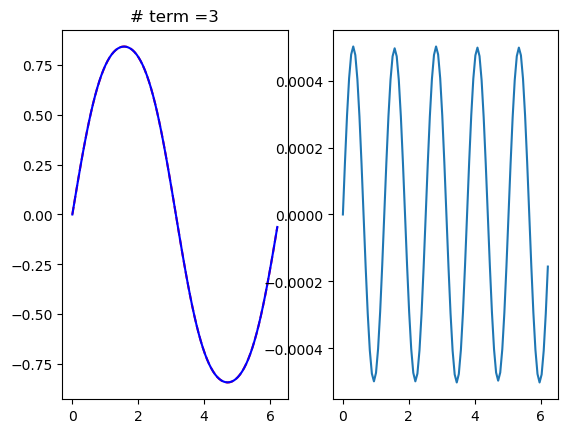

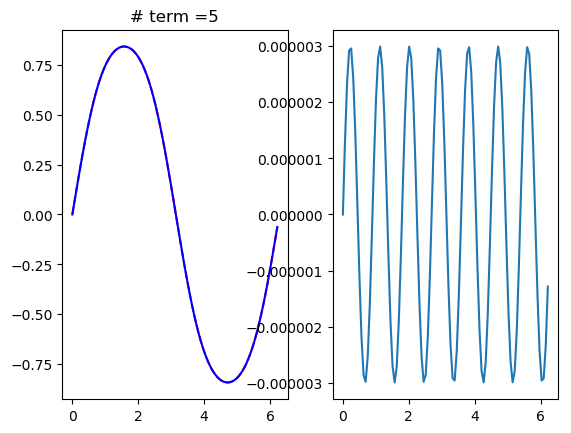

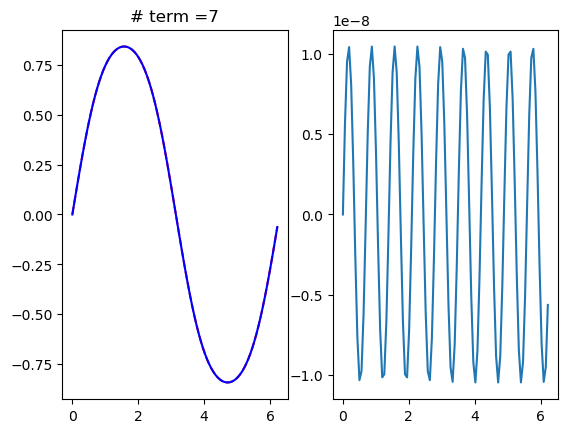

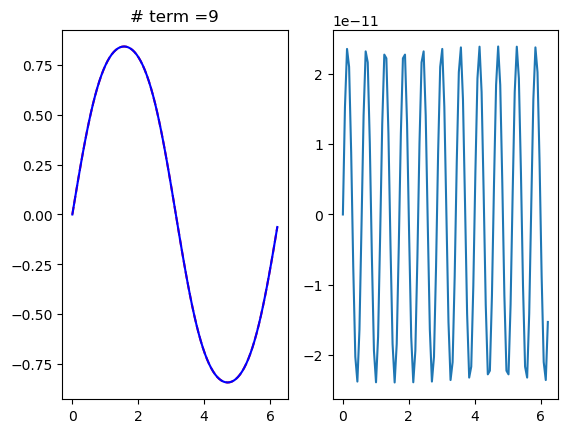

In [58]:
N=100
x_vec=[i*(2.0*pi)/N for i in 0:N-1]

@. f_vec= sin(sin(x_vec))

term_vec = collect(1:2:10)
for l = 1 : length(term_vec)
    n_term = term_vec[l]
    g_vec = zeros(size(x_vec))
    for k = -n_term : n_term
        gk = 1.0/N*sum(exp.(-1im*k*x_vec).*f_vec)
        g_vec = g_vec + gk * exp.(1im*k*x_vec)
    end
    g_vec = real(g_vec)
    figure(l)
    subplot(1,2,1)
    title("# term =$n_term")
    plot(x_vec,f_vec,"r--")
    plot(x_vec,g_vec,"b-")
    subplot(1,2,2)
    plot(x_vec,f_vec-g_vec)
end
